# EDA SampleSuperstore

#### Merin George 
### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
### As a business manager, try to find out the weak areas where you can work to make more profit.
### What all business problems you can derive by exploring the data?

### Dataset: https://bit.ly/3i4rbWl

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/data's sem 3/GRIP_task_3.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
print("null values any\n",df.isnull().sum())
print("duplicated values: ",df.duplicated().sum())

null values any
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
duplicated values:  17


In [6]:
df = df.drop_duplicates()

In [7]:
print(df.columns)
print(df.shape)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')
(9977, 13)


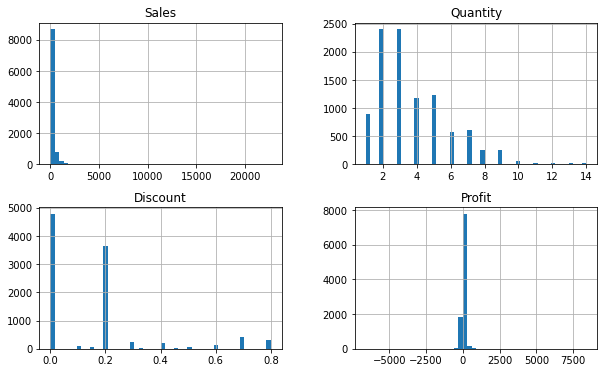

In [8]:
df = df.drop("Postal Code",axis = 1)
df.hist(bins=50 ,figsize=(10,6))
plt.show();

From the histogram plot we can observe that data is not normal.

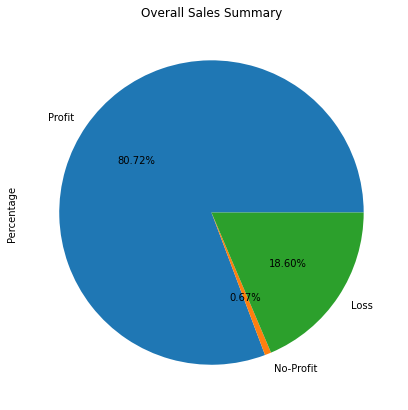

In [9]:
summary = pd.DataFrame({'Profit':df.Quantity[df.Profit > 0].sum(), 
                        'No-Profit':df.Quantity[df.Profit == 0].sum(), 
                        'Loss':df.Quantity[(df.Profit) < 0].sum()},
                       index={'Count'}).T
plt.title('Overall Sales Summary')
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7),  label  = "Percentage",
                       textprops = {"fontsize":10})
plt.show()

From the overall sales summary the profit of selling products is high. But 18% loss is a concern here. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'State and its service')

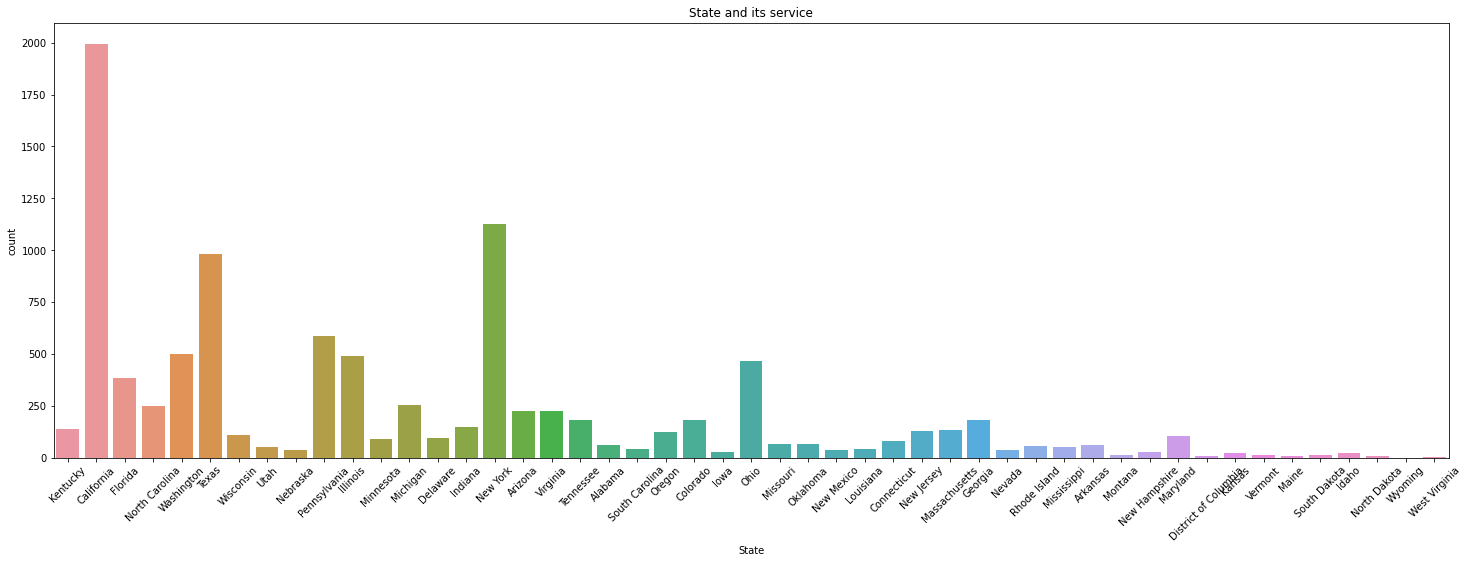

In [10]:
plt.subplots (figsize = (25,8))
sns.countplot(df["State"])
plt.xticks(rotation= 45)
plt.title("State and its service")

California, New York, Washington and Pennsylvania has reported higher number of sales. 

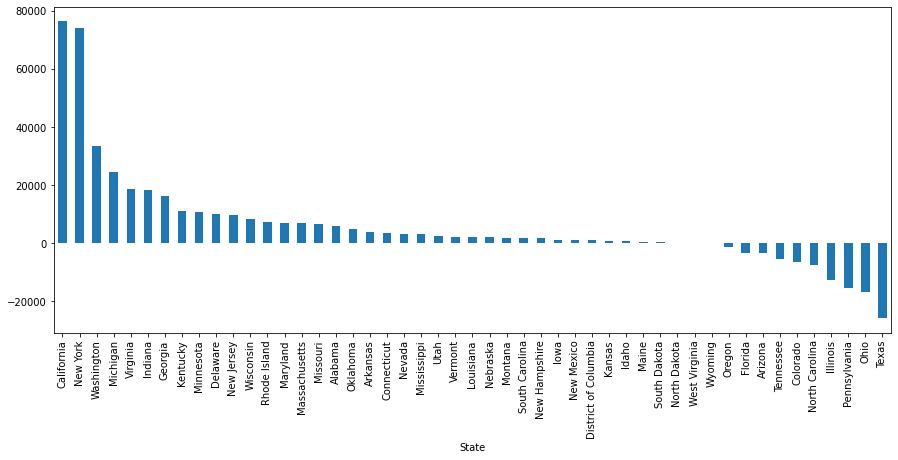

In [11]:
df.groupby("State")["Profit"].sum().sort_values(ascending = False).plot.bar(figsize = (15,6))

Even though Pennsylvania reported a good count of sales, the profit margin of that state is below zero. the other top 3 states with good count of sales are seen with good amount of profit.

what is happenig in Pennsylvania?


Text(0.5, 1.0, 'Average State-Wise Discount')

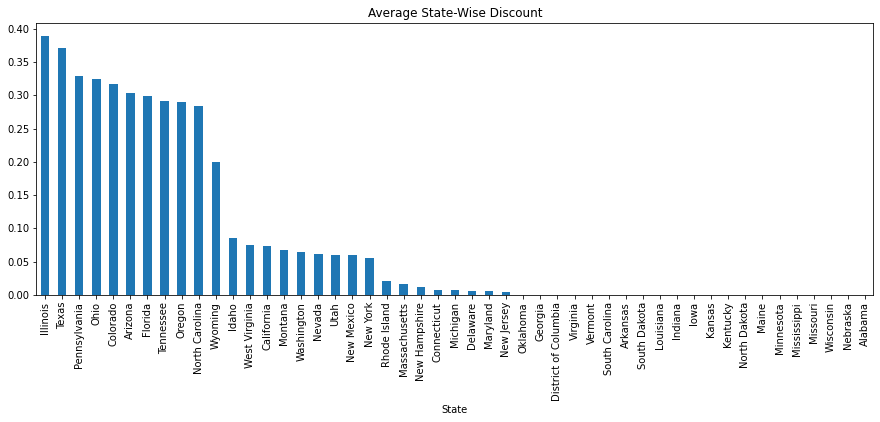

In [12]:
df_state_profit = df.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5))
plt.title('Average State-Wise Discount')

there will be a chance that countries with more discount has to suffer profit loss.

In [13]:
dfnew = df[df['State'].isin(["California","New York","Washington","Michigon","Virginia"])]

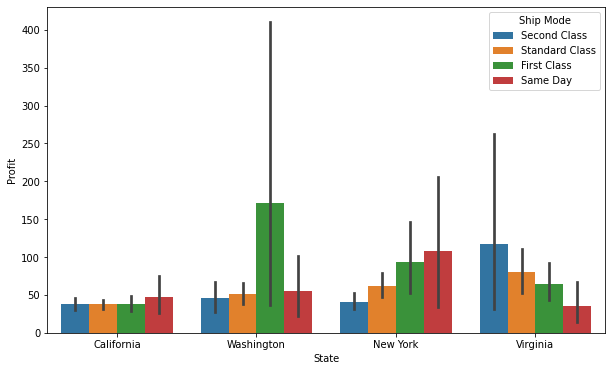

In [14]:
plt.subplots(figsize= (10,6))
sns.barplot(x= "State",y="Profit",hue = "Ship Mode",data =dfnew)

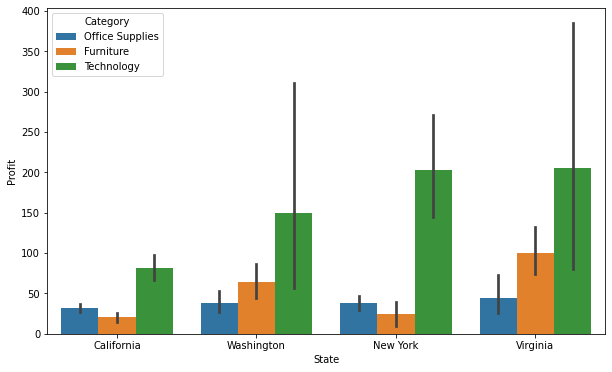

In [15]:
plt.subplots(figsize= (10,6))
sns.barplot(x= "State",y="Profit",hue = "Category",data =dfnew)

the best contributor to the profit of top profitable states are attained via its technological selling. 

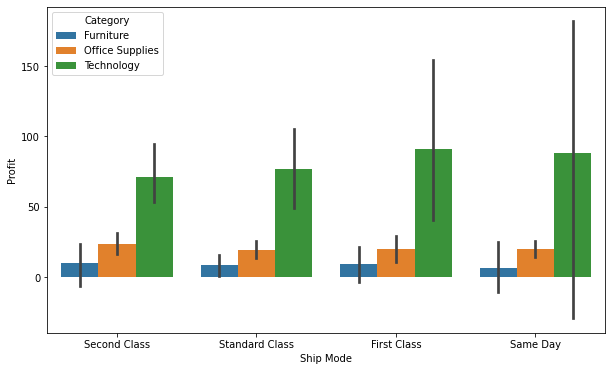

In [16]:
plt.subplots(figsize = (10,6))
sns.barplot(x = "Ship Mode",y = "Profit",hue= "Category",data = df)


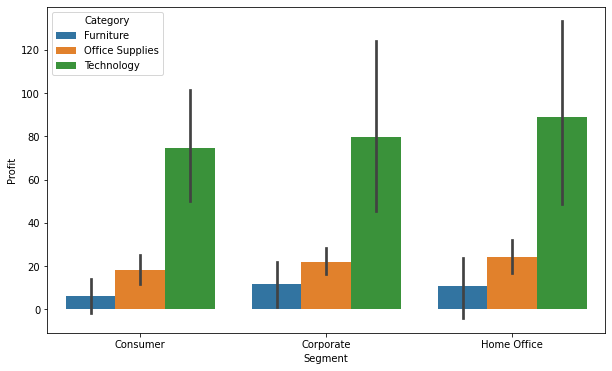

In [17]:
plt.subplots(figsize= (10,6))
sns.barplot(x= "Segment",y = "Profit",hue = "Category",data =df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


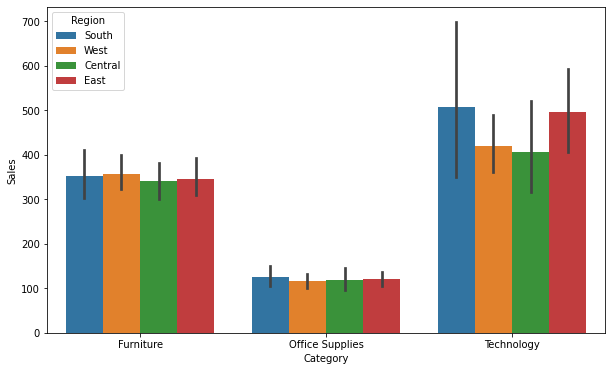

In [18]:
plt.subplots(figsize = (10,6))
sns.barplot("Category",y="Sales",hue = "Region",data = df)

Selling of technological products makes a higher profit compared to others. 

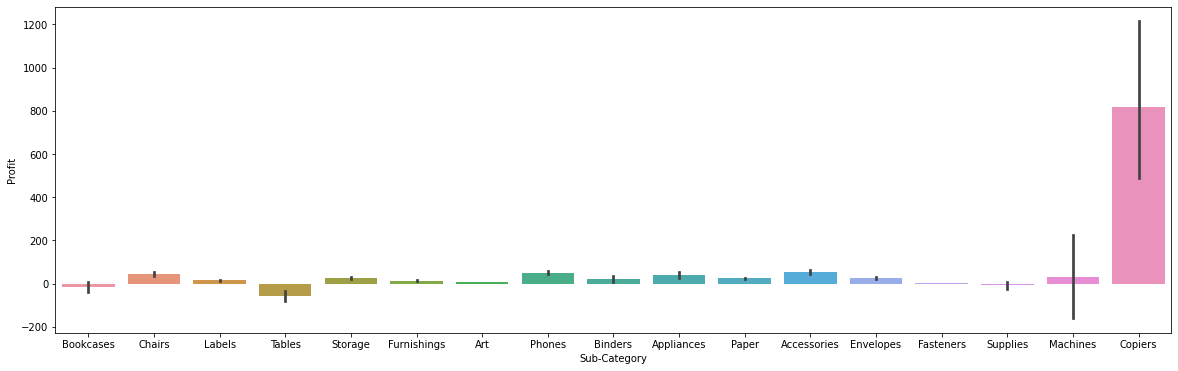

In [19]:
plt.subplots(figsize= (20,6))
sns.barplot(x = "Sub-Category",y = "Profit",data = df)

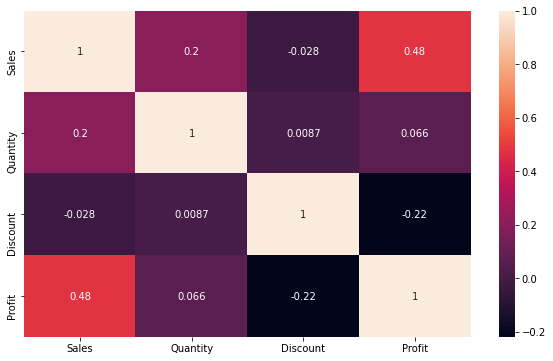

In [20]:
#df = df.drop("Postal Code",axis = 1)
plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot= True)

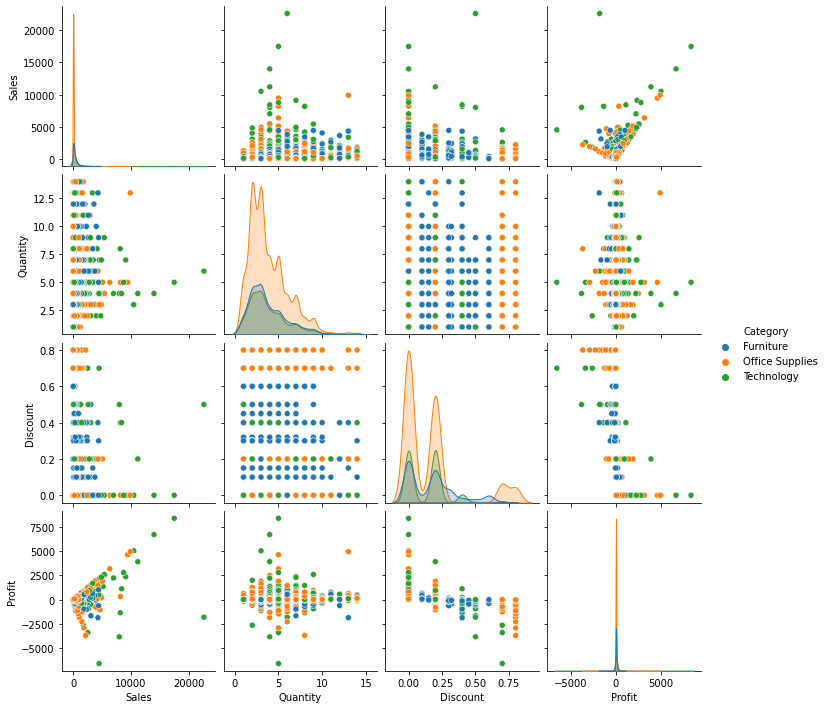

In [21]:
sns.pairplot(df,hue = "Category")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


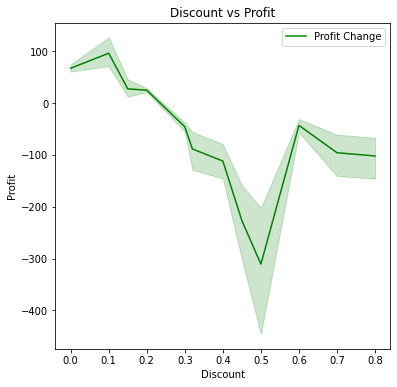

In [22]:
plt.subplots(figsize=(6,6))
plt.title('Discount vs Profit')
sns.lineplot(df.Discount, df.Profit, color='green', label='Profit Change')

profit declines as discount increases

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


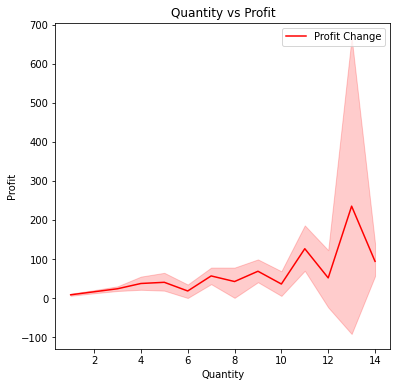

In [23]:
plt.subplots(figsize = (6,6))
plt.title('Quantity vs Profit')
sns.lineplot(df.Quantity, df.Profit, color='red', label='Profit Change')

the profit is improving as the quality increases. 

### Conclusions:
for profitable sales, 
*   the product has to sell with low/no discount. 
*   minimize the supply of less profitable items i.e. tables and bookcases
*   in Texas and Illinois the supply of furniture must reduce and promote the shipping of items in technology for better profit. 


